In [2]:
!pip install yfinance==0.1.74

In [3]:
!pip install mplcyberpunk

In [4]:
!pip install pywin32


Passo 1: Importando os módulos necessários



In [5]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk 
import win32com.client as win32


Passo 2: Pegar dados no Yahoo Finance



In [6]:
codigos_dos_ativos = ["^BVSP" , "BRL=X"]

#código que mostra a data de "hoje"
hoje = datetime.datetime.now()

#Código que mostra a data do dia que definir subtraindo a data de "hoje"
um_ano_atras = hoje - datetime.timedelta(days = 365)

#código cria uma tabela com o nome "dados mercado" com o código dos ativos estabelecidos data que eu quis iniciar até hoje
dados_mercado = yf.download(codigos_dos_ativos , um_ano_atras , hoje)

#Com essa linha de código adicionada você vai transformar todos os dados em diários 
dados_mercado = dados_mercado.resample("1D").last()

#display mostra a tabela um pouco mais bonita que em "print"
display(dados_mercado)


[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-02-07    5.3269  111996.0  5.3269  111996.0  5.3430  112517.0  5.276800   
2022-02-08    5.2626  112234.0  5.2626  112234.0  5.2849  112251.0  5.251000   
2022-02-09    5.2584  112461.0  5.2584  112461.0  5.2880  113163.0  5.232774   
2022-02-10    5.2345  113359.0  5.2345  113359.0  5.2446  113812.0  5.170000   
2022-02-11    5.2487  113572.0  5.2487  113572.0  5.2512  114899.0  5.182800   
...              ...       ...     ...       ...     ...       ...       ...   
2023-02-02    5.0535  109935.0  5.0535  109935.0  5.0545  112943.0  4.941700   
2023-02-03    5.0492  108490.0  5.0492  108490.0  5.1347  110570.0  5.046758   
2023-02-04       NaN       NaN     NaN       NaN     NaN       NaN       NaN   
2023-02-05       NaN       NaN     NaN       NaN     NaN       NaN       NaN   
2023-02-06    5.1498  108456.0  5.1498  108456.0  5.2060  108710.0  5.147992   

                          Open           Volume              
               ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                         
2022-02-07  111490.0  5.326200  112247.0    0.0  10672800.0  
2022-02-08  110943.0  5.262800  111995.0    0.0  10157500.0  
2022-02-09  111710.0  5.256489  112233.0    0.0  13794500.0  
2022-02-10  112163.0  5.231429  112462.0    0.0  13267900.0  
2022-02-11  113128.0  5.248600  113368.0    0.0  18602800.0  
...              ...       ...       ...    ...         ...  
2023-02-02  109747.0  5.053500  112072.0    0.0  15241800.0  
2023-02-03  108185.0  5.049200  110141.0    0.0  13235300.0  
2023-02-04       NaN       NaN       NaN    NaN         NaN  
2023-02-05       NaN       NaN       NaN    NaN         NaN  
2023-02-06  107416.0  5.149800  108518.0    0.0  11514600.0  

[365 rows x 12 columns]


Passo 3.1: Manipulando os dados - seleção e exclusão de dados



In [7]:
#Código pega somente a coluna selecionada da tabela
dados_fechamento = dados_mercado['Adj Close']


#Código muda o nome das colunas a sua escolha
dados_fechamento.columns = ["dolar" , "ibovespa"]


#Elimino os dados sem infomação da tabela
dados_fechamento = dados_fechamento.dropna()


Passo 3.2: Manipulando os dados - Criando tabelas com outros timeframes



In [8]:
#Deixei a base divididida anualmente e não mais diariamente como estava, a letra dentro do parenteses define a divisão y = year
dados_anuais = dados_fechamento.resample("Y").last()

dados_mensais = dados_fechamento.resample("M").last()


Passo 4 - Calcular fechamento do dia, retorno no ano e retorno no mês dos ativos



In [9]:
#trago o retorno percentual anual, pct = percent e no final já elimino as linhas sem dados com o "dropna"
retorno_anual = dados_anuais.pct_change().dropna()

#trago o retorno percentual mensal
retorno_mensal = dados_mensais.pct_change().dropna()

#trago o retorno percentual diário
retorno_diario = dados_fechamento.pct_change().dropna()

retorno_diario

,dolar,ibovespa
Date,,
2022-02-08,-0.012071,0.002125
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
...,...,...
2023-01-31,0.001508,0.014693
2023-02-01,-0.008348,-0.010825
2023-02-02,-0.003687,-0.021086



Passo 5 - Localizar o fechamento do dia anterior, retorno no mês e retorno no ano

loc -> referenciar elementos a partir do nome
iloc -> selecionar elementos como uma matriz

In [10]:
# retorno_jan_26_2022 = retorno_diario.loc['2022-01-26', 'dolar']
# retorno_jan_26_2022_iloc = retorno_diario.iloc[1, 0]

#Pego o retorno percentual do último dia da tabela, tanto para Dolar como para ibov
retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_ibov = retorno_diario.iloc[-1, 1]

#Pego o retorno percentual do último mês da tabela, tanto para Dolar como para ibov
retorno_mensal_dolar = retorno_mensal.iloc[-1, 0]
retorno_mensal_ibov = retorno_mensal.iloc[-1, 1]

#Pego o retorno percentual do último ano da tabela, tanto para Dolar como para ibov
retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_ibov = retorno_anual.iloc[-1, 1]

print(retorno_diario_dolar)
display(retorno_anual)

0.019923901731429217


,dolar,ibovespa
Date,,
2023-12-31,-0.022215,-0.014314


In [11]:
#Estou reduzindo a quantdade de casas decimais
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)
retorno_diario_ibov = round((retorno_diario_ibov * 100), 2)

#Estou reduzindo a quantdade de casas decimais
retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)
retorno_mensal_ibov = round((retorno_mensal_ibov * 100), 2) 

#Estou reduzindo a quantdade de casas decimais
retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)
retorno_anual_ibov = round((retorno_anual_ibov * 100), 2)

retorno_diario_dolar

1.99


Passo 6 - Fazer os gráficos da performance do último dos ativos



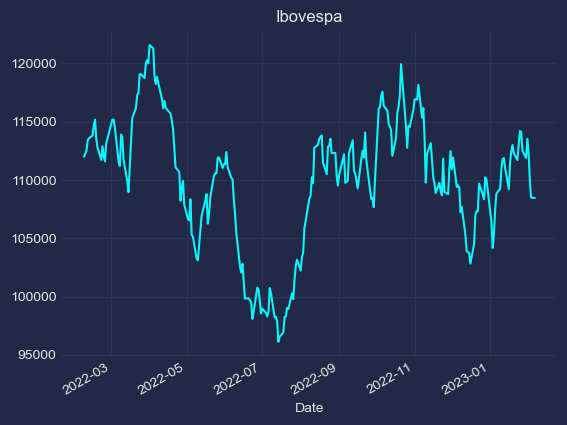

In [12]:
#utilizando o cyberpunk para deixar o gráfico mais bonito
plt.style.use("cyberpunk")


#defino o eixo y sendo a coluna Ibovespa e utilizar o indice data como eixo x 
dados_fechamento.plot(y = "ibovespa" , use_index = True, legend = False)

#dou um título para o gráfico
plt.title("Ibovespa")

#salvar a imagem no computador
plt.savefig("Ibovespa.png", dpi = 300)

plt.show()

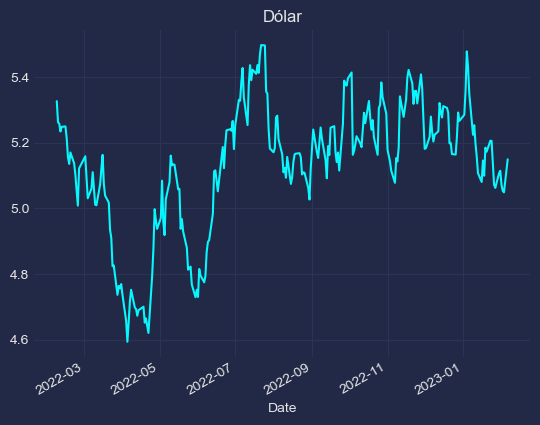

In [13]:
#utilizando o cyberpunk para deixar o gráfico mais bonito
plt.style.use("cyberpunk")


#defino o eixo y sendo a coluna Ibovespa e utilizar o indice data como eixo x 
dados_fechamento.plot(y = "dolar" , use_index = True, legend = False)

#dou um título para o gráfico
plt.title("Dólar")

#salvar a imagem no computador
plt.savefig("Dolar.png", dpi = 300)

plt.show()

Passo 7: Enviar e-mail

In [14]:
outlook = win32.Dispatch("outlook.application")


email = outlook.CreateItem(0)

In [15]:
email.To = "luis.f.aguiar95@gmail.com"
email.Subject = "Relatório Diário"

email.Body = f''' Prezado(a) , segue o relatório diário:

Bolsa:

No ano o Ibovespa está tendo uma rentabilidade de {retorno_anual_ibov}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_ibov}%.

No último dia útil, o fechamento do Ibovespa foi de {retorno_diario_ibov}%.

Dólar:

No ano o Dólar está tendo uma rentabilidade de {retorno_anual_dolar}%, 
enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%.

No último dia útil, o fechamento do Dólar foi de {retorno_diario_dolar}%.


Abs,

Luis Felipe

'''

anexo_ibovespa = r'C:\Users\luisf\Documents\Python Varos\Aula 1 - Relatório por Email\Ibovespa.png'

anexo_dolar = r'C:\Users\luisf\Documents\Python Varos\Aula 1 - Relatório por Email\Dolar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()